<a href="https://colab.research.google.com/github/Flock1/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

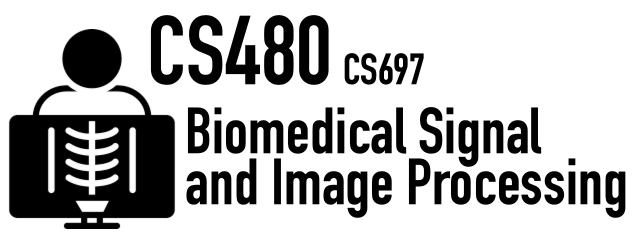
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 4.3 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [3]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [4]:
!wget https://cs480.org/data/ct.zip

--2022-04-12 00:29:23--  https://cs480.org/data/ct.zip
Resolving cs480.org (cs480.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to cs480.org (cs480.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.08s   

2022-04-12 00:29:24 (70.1 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [5]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [15]:
import os
from glob import glob

In [7]:
data = os.listdir("ct/")

In [8]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [9]:
# TODO: YOUR_ANSWER
print(len(data))
#220

220


In [10]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [11]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

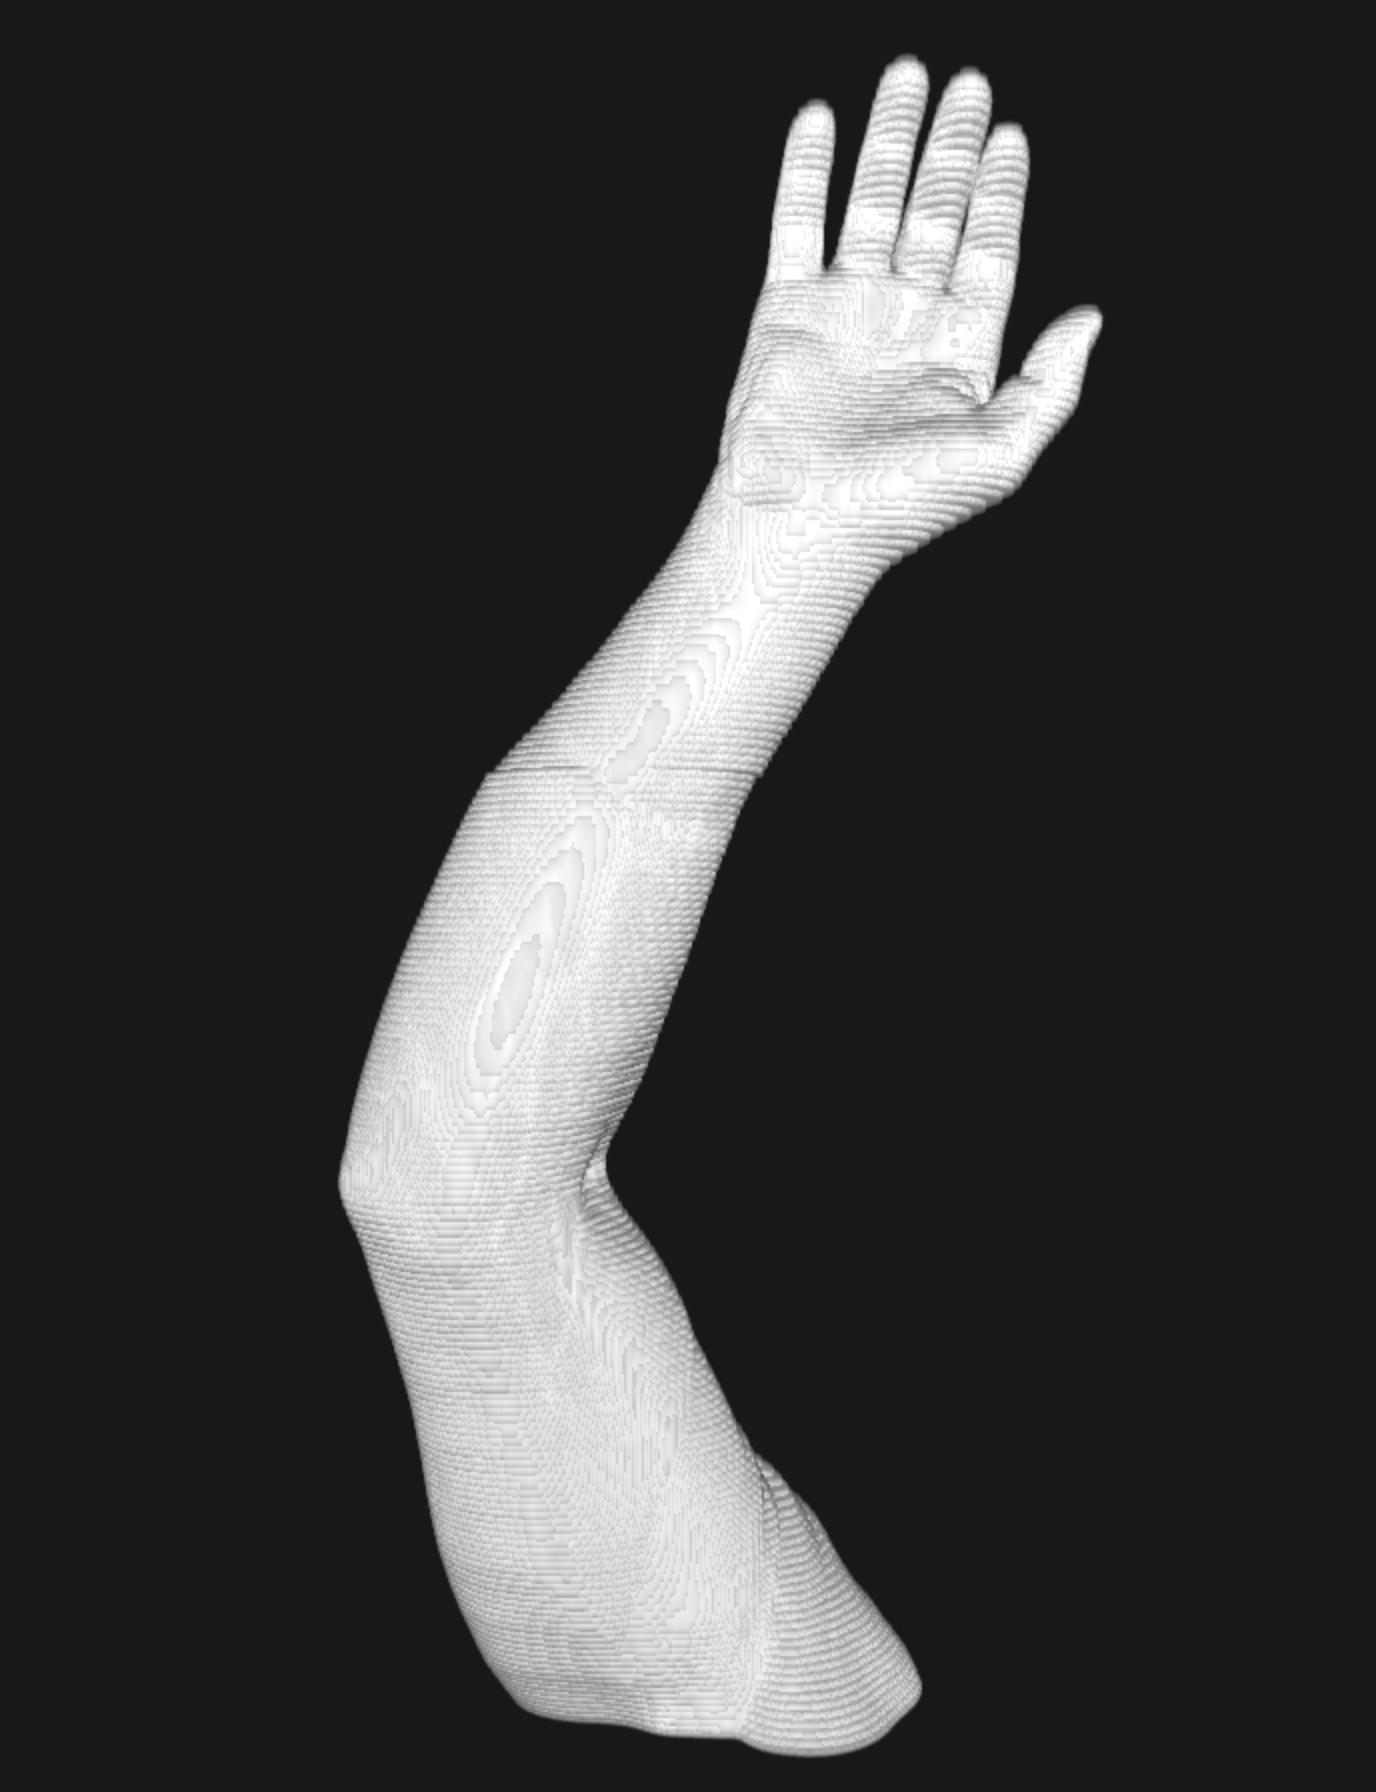

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [ ]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [16]:
from pydicom import dcmread
import sys

In [71]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
img_1 = dcmread("ct/"+data[120])
# data = sorted(data)

In [72]:
slices = []
skipcount = 0
files = []
for f in data:
    img = dcmread("ct/"+f)
    if hasattr(img, 'SliceLocation'):
        slices.append(img)
    else:
        skipcount = skipcount + 1
print(skipcount)

0


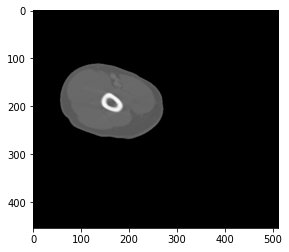

In [73]:
img = img_1.pixel_array
plt.imshow(img, cmap='gray')

In [ ]:
# data_3d = []
# slice_1 = np.zeros(img.shape)
# for i in data:
#   tmp = dcmread("ct/"+i)
#   orient = np.array((tmp.ImageOrientationPatient), dtype=int)
#   img = tmp.pixel_array
#   if(np.allclose(orient,np.array([1,0,0,0,0,-1]))):
#     data_3d.append(np.array([(img),(slice_1),(slice_1)]))
#   elif(np.allclose(orient,np.array([0,1,0,0,0,-1]))):
#     data_3d.append(np.array([(slice_1),(img),(slice_1)]))
#   elif(np.allclose(orient,np.array([1,0,0,0,1,0]))):
#     data_3d.append(np.array([(slice_1),(slice_1),(img)]))
# for i in range(len(data_3d)):
#   tmp = data_3d[i]
#   shape = tmp.shape
#   tmp = np.reshape(tmp,(shape[1],shape[2],shape[0]))
#   data_3d[i] = tmp

#1st dimension is Coronal, 2nd slice is Sagittal and 3rd is Axial. Just like RGB, it is CSA

In [23]:
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

In [24]:
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

In [ ]:
# from numpy import dtype
# orient = np.array((img_1.ImageOrientationPatient), dtype=int)
# for i in data:
#   img_1 = dcmread("ct/"+i)
#   orient = np.array((img_1.ImageOrientationPatient), dtype=int)
#   print(orient)

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

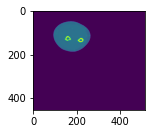

In [25]:
# TODO: YOUR CODE FOR AXIAL
# plt.imshow(data_3d[100][:,:,2], cmap='gray')
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

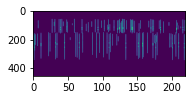

In [26]:
# TODO: YOUR CODE FOR SAGITTAL
# plt.imshow(data_3d[100][:,:,1], cmap='gray')
a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

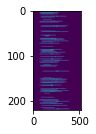

In [28]:
# TODO: YOUR CODE FOR CORONAL
# plt.imshow(data_3d[100][:,:,0], cmap='gray')
a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [65]:
# TODO: YOUR CODE
slices[0][('0028', '1051')]

(0028, 1051) Window Width                        DS: '410.0'

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [74]:
# TODO: YOUR CODE
i = 200
window_center = float(slices[i][('0028','1050')].value)
window_width = float(slices[i][('0028','1051')].value)
vmin = window_center - window_width/2
vmax = window_center + window_width/2
img = slices[i].pixel_array
img[img<vmin] = vmin 
img[img>vmax] = vmax 
img = (img - vmin) / (vmax - vmin)*255.0 

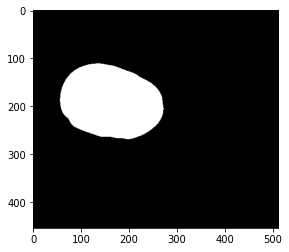

In [77]:
plt.imshow(img, cmap='gray')

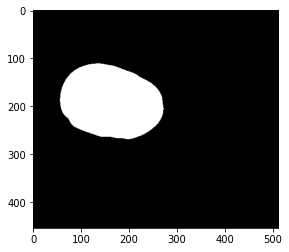

In [79]:
plt.imshow(img_1.pixel_array, cmap='gray')

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""